In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Task3')

In [5]:
import pandas as pd
import numpy as np


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!pip install neattext


     |████████████████████████████████| 112kB 6.1MB/s 


In [8]:
import neattext.functions as nfx

In [227]:
#df = pd.read_csv('comment.csv')
df = pd.read_csv('comment1.csv')
#df = pd.read_csv('comment2.csv')

In [228]:
df.head()

,Emotion,Comment ID,Comment
0,Other,UgwfzjV7Ljcdn7W3d9B4AaABAg,"Nhìn ngày tốt nghiệp ai cũng vui mừng, đâu biế..."
1,Disgust,UgxHMdZki_Fp4_BcZXR4AaABAg,"Tập cuối lại leo trending, Youtube ngáo thiệt"
2,Enjoyment,Ugyf0dB6V_2gsaw3qI14AaABAg,"Thích team làm về phim học đường cấp 3, cảm gi..."
3,Sadness,Ugxz6DMQqe4QYAb0-qB4AaABAg,"Có ai giống tôi không , tới đoạn Hải An bước r..."
4,Other,UgxBAQ3UvgssAeOBSUF4AaABAg,Cuối cùng thì chỉ có thằng giàu và người thích...


In [229]:
df.shape

(99, 3)

In [230]:
df.dtypes

Emotion       object
Comment ID    object
Comment       object
dtype: object

In [231]:
df.isnull().sum()

Emotion       0
Comment ID    0
Comment       0
dtype: int64

In [232]:
df.Emotion.value_counts()

Enjoyment    38
Other        26
Sadness      21
Suprise       8
Disgust       3
Anger         2
Fear          1
Name: Emotion, dtype: int64

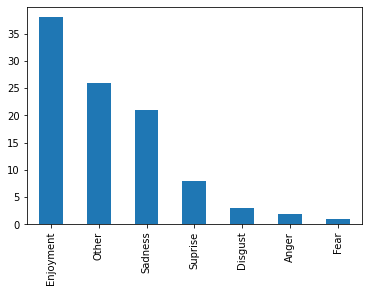

In [233]:
df.Emotion.value_counts().plot(kind = 'bar')

Sentiment analysis

In [234]:
from textblob import TextBlob

In [235]:
!pip install underthesea


In [236]:
from underthesea import sentiment


In [237]:
df['Sentiment'] = df['Comment'].apply(sentiment)


In [238]:
df.head()

,Emotion,Comment ID,Comment,Sentiment
0,Other,UgwfzjV7Ljcdn7W3d9B4AaABAg,"Nhìn ngày tốt nghiệp ai cũng vui mừng, đâu biế...",negative
1,Disgust,UgxHMdZki_Fp4_BcZXR4AaABAg,"Tập cuối lại leo trending, Youtube ngáo thiệt",None
2,Enjoyment,Ugyf0dB6V_2gsaw3qI14AaABAg,"Thích team làm về phim học đường cấp 3, cảm gi...",positive
3,Sadness,Ugxz6DMQqe4QYAb0-qB4AaABAg,"Có ai giống tôi không , tới đoạn Hải An bước r...",negative
4,Other,UgxBAQ3UvgssAeOBSUF4AaABAg,Cuối cùng thì chỉ có thằng giàu và người thích...,None


In [239]:
# compare our emotion vs sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion    Sentiment
Anger      negative      1
           positive      1
Disgust    negative      1
Enjoyment  negative     10
           positive     22
Other      negative      5
           positive      7
Sadness    negative      6
           positive      4
Suprise    negative      1
dtype: int64

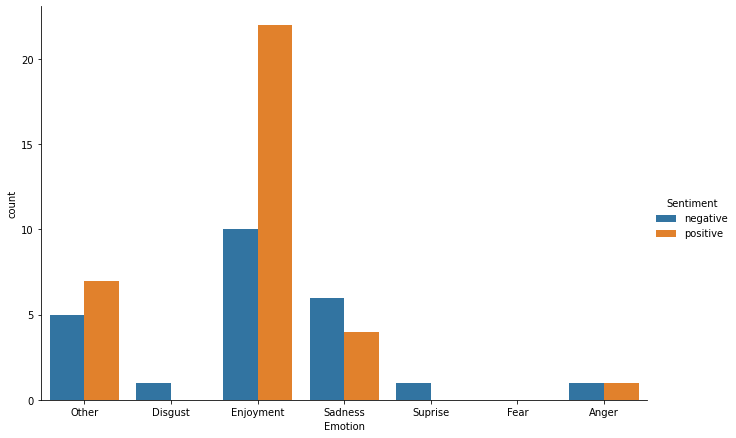

In [240]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size = 6,aspect=1.5)

In [241]:
df['Clean_Comment']= df['Comment'].apply(nfx.remove_userhandles)

In [242]:
df['Clean_Comment']= df['Comment'].apply(nfx.remove_punctuations)

In [243]:
df['Clean_Comment']= df['Comment'].apply(nfx.remove_emojis)

In [244]:
df['Clean_Comment']= df['Comment'].apply(nfx.remove_stopwords)

In [245]:
df[['Comment','Clean_Comment']]

,Comment,Clean_Comment
0,"Nhìn ngày tốt nghiệp ai cũng vui mừng, đâu biế...","Nhìn ngày tốt nghiệp ai cũng vui mừng, đâu biế..."
1,"Tập cuối lại leo trending, Youtube ngáo thiệt","Tập cuối lại leo trending, Youtube ngáo thiệt"
2,"Thích team làm về phim học đường cấp 3, cảm gi...","Thích team làm về phim học đường cấp 3, cảm gi..."
3,"Có ai giống tôi không , tới đoạn Hải An bước r...","Có ai giống tôi không , tới đoạn Hải bước ra l..."
4,Cuối cùng thì chỉ có thằng giàu và người thích...,Cuối cùng thì chỉ có thằng giàu và người thích...
...,...,...
94,Khổ là khổ người bên cạnh mik.,Khổ là khổ người bên cạnh mik.
95,Ước j đc náy. Hôm qua mới ước tập cuối là phải...,Ước j đc náy. Hôm qua mới ước tập cuối là phải...
96,Áaaaa.... Otis cười đẹp quá,Áaaaa.... Otis cười đẹp quá
97,"Hay quá Faptv ơi, ko làm thanh niên U32 còn độ...","Hay quá Faptv ơi, ko làm thanh niên U32 còn độ..."


In [246]:
from collections import Counter

In [247]:
def extract_keyword(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [248]:
emotion_list = df['Emotion'].unique().tolist()

In [249]:
emotion_list

['Other', 'Disgust', 'Enjoyment', 'Sadness', 'Suprise', 'Fear', 'Anger']

In [250]:
joy_list=df[df['Emotion']== 'Enjoyment']['Clean_Comment'].tolist()

In [251]:
joy_docx=' '.join(joy_list)

In [252]:
joy_docx

'Thích team làm về phim học đường cấp 3, cảm giác vui vẻ ngây thơ và thích xem hơn nữa...! 35:20 quả rơi đt ko hề giả trân😆😆 đoạn mất con cảnh vừa quay ra nước mắt chị Tuyền lăn xuống, đạt ghê Tình yêu giống như của Cao Lâm với Hải đúng là tình yêu thật sự thấy hạnh phúc sao á trãi qua bao nhiêu chuyện cũng quay lại và có cái kết đẹp :3 1like là không xứng đáng với bao nhiêu nước mắt của mình ^^ Phim học sinh , sinh viên của Fap tv không bao giờ làm chúng ta thất vọng 35:20 Nét diễn ko hề giả trân nhoa mọi ngừi😁😁😁 Chời ơi tui mê Thái Vũ quá lun ak 48:50 ko biết cố tình hay vô tình nhưng mà CL mém té Cảnh đó đỉnh á Thể hiện đc nhiều thứ Tự dưng thích cái kết mọi người nhìn nhận lại và tập trung mừng 1 bữa tiệc nhỉ fap tv Hải vừa xinh vừa diễn đỉnh vl gọi là xuất con mẹ nó sắc luôn , biểu cảm bất ngờ chang phim em của anh đừng của ai 1 seri bánh cuốn nhưng vẫn thấy best nhất là " Em của đừng của ai. " Chúc mừng team!!! bắt buộc phải đốt cháy giai đoạn tình tiết phim vì covid nhằm phục vụ

In [253]:
#Extract Keywords
keyword_joy = extract_keyword(joy_docx)

In [254]:
keyword_joy

{',': 3,
 '1': 4,
 'Fap': 3,
 'Hải': 4,
 'anh': 4,
 'bao': 3,
 'bất': 3,
 'chuyện': 3,
 'chất': 5,
 'cũng': 3,
 'cảm': 3,
 'của': 11,
 'diễn': 5,
 'em': 3,
 'giả': 4,
 'hay': 6,
 'không': 4,
 'ko': 4,
 'kết': 4,
 'luôn': 6,
 'là': 11,
 'làm': 5,
 'mắt': 4,
 'mừng': 3,
 'ngờ': 3,
 'như': 4,
 'nhưng': 3,
 'nước': 3,
 'phim': 8,
 'quá': 6,
 'rất': 5,
 'sinh': 3,
 'sắc': 3,
 'sự': 3,
 'thích': 3,
 'thất': 3,
 'thấy': 3,
 'thật': 3,
 'tình': 5,
 'tập': 4,
 'viên': 4,
 'và': 6,
 'vọng': 3,
 'vừa': 6,
 'xinh': 4,
 'xuất': 3,
 'yêu': 3,
 'á': 3,
 'đoạn': 4,
 'đẹp': 6}

In [255]:
def plot_most_common_words(mydict):
  df_01 =pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize= (20,10))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation = 45)
  plt.show()

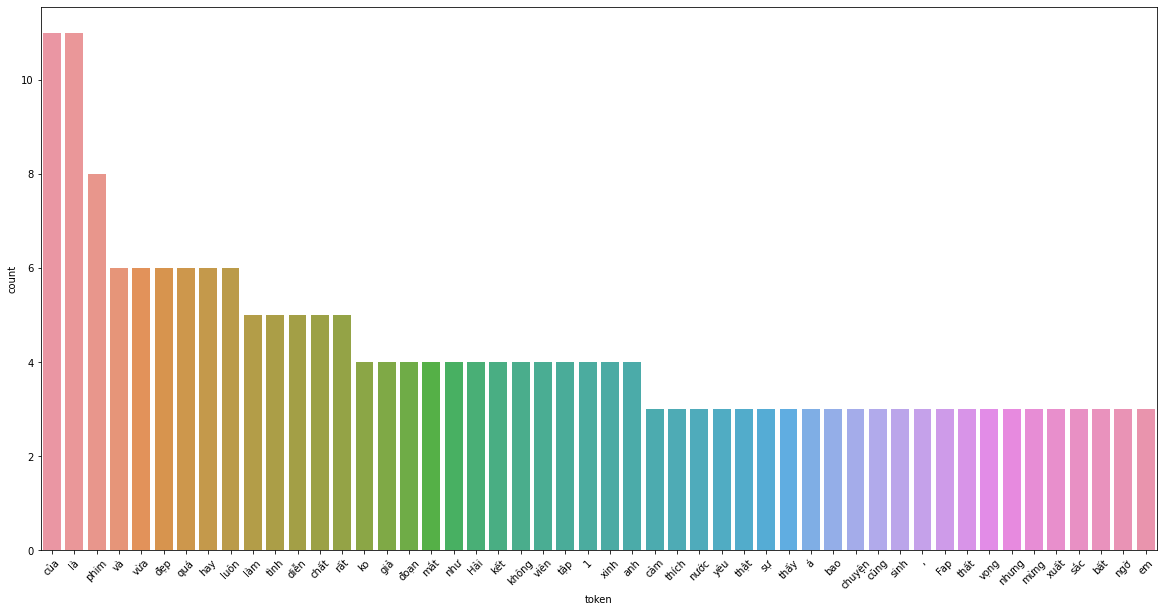

In [256]:
plot_most_common_words(keyword_joy)

In [257]:
from wordcloud import WordCloud

In [258]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

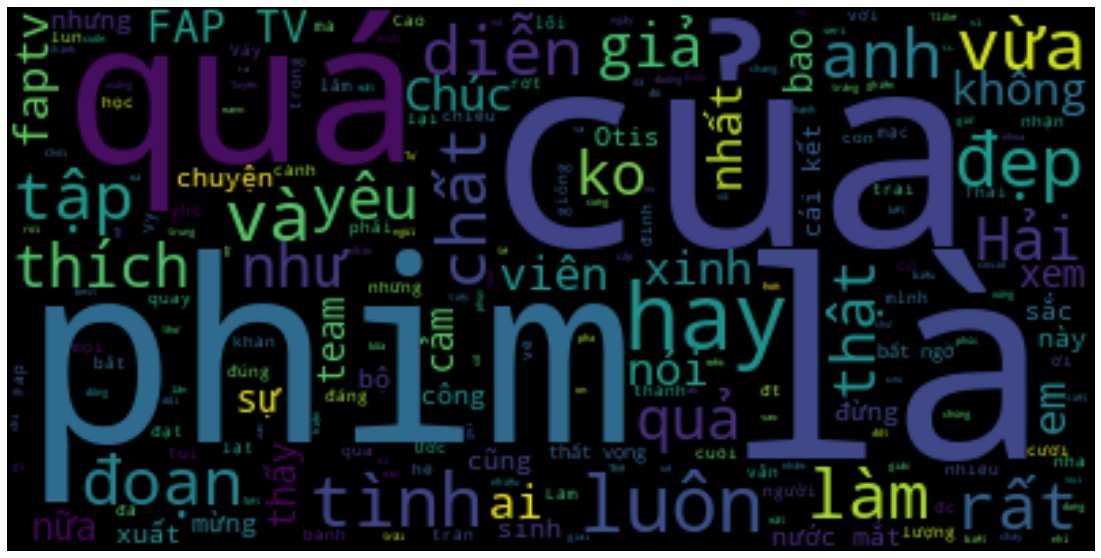

In [259]:
plot_wordcloud(joy_docx)

Machine Learning

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [261]:
#Split our dataset
from sklearn.model_selection import train_test_split

In [262]:
###BUild feature from our text
Xfeatures = df['Clean_Comment']
ylabels= df['Emotion']


In [263]:
Xfeatures

0     Nhìn ngày tốt nghiệp ai cũng vui mừng, đâu biế...
1         Tập cuối lại leo trending, Youtube ngáo thiệt
2     Thích team làm về phim học đường cấp 3, cảm gi...
3     Có ai giống tôi không , tới đoạn Hải bước ra l...
4     Cuối cùng thì chỉ có thằng giàu và người thích...
                            ...                        
94                       Khổ là khổ người bên cạnh mik.
95    Ước j đc náy. Hôm qua mới ước tập cuối là phải...
96                          Áaaaa.... Otis cười đẹp quá
97    Hay quá Faptv ơi, ko làm thanh niên U32 còn độ...
98                Công nhận Otis đẹp trai lắm luôn áaaa
Name: Clean_Comment, Length: 99, dtype: object

In [264]:
# Vectorizer
cv = CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [265]:
cv.get_feature_names()

['08',
 '15',
 '1like',
 '20',
 '21',
 '22',
 '29',
 '2ac',
 '2k3',
 '30',
 '33',
 '35',
 '36',
 '43',
 '48',
 '4k',
 '50',
 '90',
 '9x',
 'ae',
 'ai',
 'ak',
 'anh',
 'bao',
 'best',
 'biết',
 'biểu',
 'buô',
 'buộc',
 'bà',
 'bài',
 'bánh',
 'bây',
 'bé',
 'bên',
 'bước',
 'bạn',
 'bất',
 'bắt',
 'bệnh',
 'bị',
 'bỏ',
 'bộ',
 'bữa',
 'ca',
 'cao',
 'cha',
 'chang',
 'chi',
 'chiếu',
 'chuyện',
 'cháy',
 'chú',
 'chúc',
 'chúng',
 'chất',
 'chậm',
 'chắc',
 'chết',
 'chỉ',
 'chị',
 'chời',
 'chục',
 'chủ',
 'chứ',
 'cl',
 'coi',
 'con',
 'covid',
 'cty',
 'cuối',
 'cuốn',
 'cuộc',
 'cx',
 'cái',
 'còn',
 'có',
 'cóc',
 'cô',
 'công',
 'cùng',
 'cũng',
 'cơ',
 'cưng',
 'cưới',
 'cười',
 'cạnh',
 'cả',
 'cảm',
 'cảnh',
 'cấp',
 'cặp',
 'cố',
 'của',
 'cứ',
 'danh',
 'dc',
 'diên',
 'diễn',
 'duyên',
 'dzũ',
 'dài',
 'dã',
 'dép',
 'dôi',
 'dù',
 'dưng',
 'dương',
 'dịch',
 'em',
 'fap',
 'faptivi',
 'faptv',
 'file',
 'ftv',
 'ghiền',
 'ghê',
 'giai',
 'gian',
 'giàu',
 'giác',
 'giả',


In [266]:
#Split dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size = 0.3,random_state=42)

In [267]:
# Build model
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinominalNB()

In [268]:
#Acuracy
nv_model.score(X_test, y_test)

0.5333333333333333

In [269]:
#Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [270]:
y_pred_for_nv

array(['Enjoyment', 'Enjoyment', 'Other', 'Other', 'Enjoyment', 'Other',
       'Other', 'Sadness', 'Sadness', 'Other', 'Sadness', 'Sadness',
       'Sadness', 'Sadness', 'Sadness', 'Other', 'Enjoyment', 'Enjoyment',
       'Sadness', 'Enjoyment', 'Other', 'Enjoyment', 'Enjoyment',
       'Sadness', 'Enjoyment', 'Other', 'Enjoyment', 'Other', 'Enjoyment',
       'Enjoyment'], dtype='<U9')

Model Evaluation

In [271]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

     Disgust       0.00      0.00      0.00         1
   Enjoyment       0.67      0.67      0.67        12
       Other       0.44      0.44      0.44         9
     Sadness       0.44      0.80      0.57         5
     Suprise       0.00      0.00      0.00         3

    accuracy                           0.53        30
   macro avg       0.31      0.38      0.34        30
weighted avg       0.47      0.53      0.50        30



In [272]:
#Confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[0, 0, 1, 0, 0],
       [0, 8, 1, 3, 0],
       [0, 3, 4, 2, 0],
       [0, 0, 1, 4, 0],
       [0, 1, 2, 0, 0]])

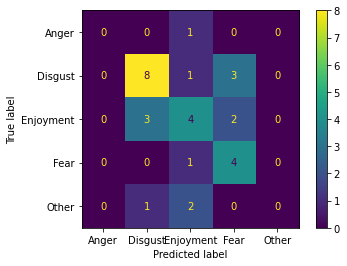

In [273]:
plot_confusion_matrix(nv_model,X_test,y_test)